In [1]:
# import all the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import xlrd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn import preprocessing  
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [4]:
n = np.array([91,93,82,99,56,78,100,78])

In [5]:
n

array([ 91,  93,  82,  99,  56,  78, 100,  78])

In [7]:
n>90

array([ True,  True, False,  True, False, False,  True, False])

In [14]:
n[n>90]

array([ 91,  93,  99, 100])

In [2]:
#load the file data
df= pd.read_excel('Rollins data.xlsx',sheet_name='List')

In [3]:
df

,categoryname,categoryname.1,Branch,accountid,siteid,programid,programname,saledate,Sale_Value,Annual_Value,...,materials_invoiced,services_invoiced,Total_Invoiced_By_Program,,Site Name,Site Address,ZIP,Billing Name,Billing Address,Billing ZIP
0,85-Northeast Division,369-New England Region,"969-BANGOR SALES/SVC CNTR, ME",1886600,9852078,9014094,Bed Bug Proact - Monthly,2018-03-22,1704.0,1704.0,...,NaN,142.00,3994.46,Contact Information >>>,AROOSTOOK MENTAL HEALTH CENTER,"2 AIRPORT DR, PRESQUE ISLE ME",4769,AMHC,"PO Box 1018 , Caribou ME",4736
1,85-Northeast Division,369-New England Region,"969-BANGOR SALES/SVC CNTR, ME",1886600,9852078,9014094,Bed Bug Proact - Monthly,2018-03-22,1704.0,1704.0,...,NaN,142.00,3994.46,Contact Information >>>,AROOSTOOK MENTAL HEALTH CENTER,"2 AIRPORT DR, PRESQUE ISLE ME",4769,AMHC,"PO Box 1018 , Caribou ME",4736
2,85-Northeast Division,369-New England Region,"969-BANGOR SALES/SVC CNTR, ME",1886600,9852078,9014094,Bed Bug Proact - Monthly,2018-03-22,1704.0,1704.0,...,NaN,142.00,3994.46,Contact Information >>>,AROOSTOOK MENTAL HEALTH CENTER,"2 AIRPORT DR, PRESQUE ISLE ME",4769,AMHC,"PO Box 1018 , Caribou ME",4736
3,85-Northeast Division,369-New England Region,"969-BANGOR SALES/SVC CNTR, ME",1886600,9852078,9014094,Bed Bug Proact - Monthly,2018-03-22,1704.0,1704.0,...,NaN,142.00,3994.46,Contact Information >>>,AROOSTOOK MENTAL HEALTH CENTER,"2 AIRPORT DR, PRESQUE ISLE ME",4769,AMHC,"PO Box 1018 , Caribou ME",4736
4,85-Northeast Division,369-New England Region,"969-BANGOR SALES/SVC CNTR, ME",1886600,9852078,9014094,Bed Bug Proact - Monthly,2018-03-22,1704.0,1704.0,...,NaN,142.00,3994.46,Contact Information >>>,AROOSTOOK MENTAL HEALTH CENTER,"2 AIRPORT DR, PRESQUE ISLE ME",4769,AMHC,"PO Box 1018 , Caribou ME",4736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2263,81-Southeast Division,149-N. Florida Region,"232-PENSACOLA, FL",33909338,12093964,10642007,Bed Bug Proact - Monthly,2020-04-02,1080.0,1080.0,...,NaN,90.00,360.00,Contact Information >>>,MONA LISA HOTEL,"4950 MOBILE HIGHWAY, PENSACOLA FL",32505,,"4950 MOBILE HIGHWAY, PENSACOLA FL",32505
2264,81-Southeast Division,149-N. Florida Region,"232-PENSACOLA, FL",33909338,12093964,10642007,Bed Bug Proact - Monthly,2020-04-02,1080.0,1080.0,...,NaN,90.00,360.00,Contact Information >>>,MONA LISA HOTEL,"4950 MOBILE HIGHWAY, PENSACOLA FL",32505,,"4950 MOBILE HIGHWAY, PENSACOLA FL",32505
2265,86-Pacific Division,829-Colorado Region,"892-GRAND JUNCTION, CO",33737882,11898315,10726377,Bed Bug Proact - Semi-Annual,2020-05-01,3060.0,3060.0,...,NaN,1530.00,1530.00,Contact Information >>>,BRETTELBERG CONDOS,"1546 PO. BOX , GLENWOOD SPRINGS CO",81602,,"1546 PO. BOX , GLENWOOD SPRINGS CO",81602
2266,86-Pacific Division,829-Colorado Region,"884-DURANGO, CO",34193685,12409315,10889860,Bed Bug Proact - Monthly,2020-06-22,21590.0,21590.0,...,NaN,899.58,1799.16,Contact Information >>>,.. ..,"191 PAGOSA ST, PAGOSA SPRINGS CO",81147,.. ..,"191 PAGOSA ST, PAGOSA SPRINGS CO",81147


In [4]:
len(df.siteid.unique())

111

In [5]:
# get basic info about the dataframe
df.columns

Index(['categoryname', 'categoryname.1', 'Branch', 'accountid', 'siteid',
       'programid', 'programname', 'saledate', 'Sale_Value', 'Annual_Value',
       'Cancel_date', 'Program_Sales_Person', 'Program Type', 'eventid', 'WO#',
       'eventname', 'completeddate', 'completedamount',
       'Chemical_Materials_Applied_Count', 'Product_Materials_Applied_Count',
       'Bait_Materials_Applied_Count', 'Hardware_Materials_Applied_Count',
       'Equipment_Materials_Applied_Count', 'Service_Materials_Applied_Count',
       'Chemical_Materials_Applied', 'Product_Materials_Applied',
       'Bait_Materials_Applied', 'Hardware_Materials_Applied',
       'Equipment_Materials_Applied', 'service_Materials_Applied',
       'Material_Total_price', 'materials_invoiced', 'services_invoiced',
       'Total_Invoiced_By_Program', ' ', 'Site Name', 'Site Address', 'ZIP',
       'Billing Name', 'Billing Address', 'Billing ZIP'],
      dtype='object')

In [6]:
# some basic features we will use to predict the materials
x=df[['categoryname','categoryname.1','Branch','siteid','programid','programname','Program Type',
      'eventid', 'WO#','eventname', 'Site Name', 'Site Address', 'ZIP']]
x

,categoryname,categoryname.1,Branch,siteid,programid,programname,Program Type,eventid,WO#,eventname,Site Name,Site Address,ZIP
0,85-Northeast Division,369-New England Region,"969-BANGOR SALES/SVC CNTR, ME",9852078,9014094,Bed Bug Proact - Monthly,PC,23285075,172192860,PC 1st Service,AROOSTOOK MENTAL HEALTH CENTER,"2 AIRPORT DR, PRESQUE ISLE ME",4769
1,85-Northeast Division,369-New England Region,"969-BANGOR SALES/SVC CNTR, ME",9852078,9014094,Bed Bug Proact - Monthly,PC,23285076,172192862,PC Standard,AROOSTOOK MENTAL HEALTH CENTER,"2 AIRPORT DR, PRESQUE ISLE ME",4769
2,85-Northeast Division,369-New England Region,"969-BANGOR SALES/SVC CNTR, ME",9852078,9014094,Bed Bug Proact - Monthly,PC,23285076,172192863,PC Standard,AROOSTOOK MENTAL HEALTH CENTER,"2 AIRPORT DR, PRESQUE ISLE ME",4769
3,85-Northeast Division,369-New England Region,"969-BANGOR SALES/SVC CNTR, ME",9852078,9014094,Bed Bug Proact - Monthly,PC,23285076,172192864,PC Standard,AROOSTOOK MENTAL HEALTH CENTER,"2 AIRPORT DR, PRESQUE ISLE ME",4769
4,85-Northeast Division,369-New England Region,"969-BANGOR SALES/SVC CNTR, ME",9852078,9014094,Bed Bug Proact - Monthly,PC,23285076,172192865,PC Standard,AROOSTOOK MENTAL HEALTH CENTER,"2 AIRPORT DR, PRESQUE ISLE ME",4769
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2263,81-Southeast Division,149-N. Florida Region,"232-PENSACOLA, FL",12093964,10642007,Bed Bug Proact - Monthly,PC,28937333,200063681,PC Standard,MONA LISA HOTEL,"4950 MOBILE HIGHWAY, PENSACOLA FL",32505
2264,81-Southeast Division,149-N. Florida Region,"232-PENSACOLA, FL",12093964,10642007,Bed Bug Proact - Monthly,PC,28937333,200063682,PC Standard,MONA LISA HOTEL,"4950 MOBILE HIGHWAY, PENSACOLA FL",32505
2265,86-Pacific Division,829-Colorado Region,"892-GRAND JUNCTION, CO",11898315,10726377,Bed Bug Proact - Semi-Annual,PC,29233835,201290561,PC 1st Service,BRETTELBERG CONDOS,"1546 PO. BOX , GLENWOOD SPRINGS CO",81602
2266,86-Pacific Division,829-Colorado Region,"884-DURANGO, CO",12409315,10889860,Bed Bug Proact - Monthly,PC,29795370,203626475,PC 1st Service,.. ..,"191 PAGOSA ST, PAGOSA SPRINGS CO",81147


In [7]:
len(df.Chemical_Materials_Applied.unique())

350

In [8]:
# extract the target columns for chemicals
chemicals = df["Chemical_Materials_Applied"]

In [9]:
# extract the target columns for products
product = df['Product_Materials_Applied']

In [10]:
type(product)

pandas.core.series.Series

In [11]:
# extract the target columns for bait
bait=df['Bait_Materials_Applied']

In [12]:
# extract the target columns for hardware
hardware=df['Hardware_Materials_Applied']

In [13]:
# extract the target columns for equipment
equipment=df['Equipment_Materials_Applied']

In [14]:
# extract the target columns for service
service=df['service_Materials_Applied']

In [15]:
chemicals.unique()

array([' (C)STEFS, (C)TRANM11', ' (C)TRANM11', ' CID, PHN (Liquid Ounce)',
       ' PHN (Liquid Ounce)', ' (C)STEFS, PHN (Liquid Ounce)',
       ' DDT (Dust Gram), PHN (Liquid Ounce)', ' TALPRO',
       ' ADFCB, CID, PHN (Liquid Ounce)', ' TRANSGHP',
       ' (C)STEFS, TRANSGHP', ' EXCITER, PHN (Liquid Ounce)',
       ' EXCITER, TEMPRID', ' EXCITER, PT565+XLO, TEMPRID',
       ' PATROL, TALSTPL', ' EXCITER, TEMPFX', ' ALPWSG, EXCITER',
       ' TEMPFX', ' ALPWSG', ' ADFCB, TEMPFX', ' ADFCB, VENDPLUS',
       ' TEMPFX, VENDPLUS', ' (C)STEFS, CID, TEMPFX', ' ALPF&amp;B',
       ' ACBG, TEMPFX, VENDPLUS', ' ACBG, CID, PHN (Liquid Ounce)',
       ' CID, GECEG (Granular Ounce), PHN (Liquid Ounce), TALPRO',
       ' ACGB (Gram), PT565+XLO, TEMPRID', ' (C)TRANM11, CID',
       ' ADFCB, EXCITER, PT565+XLO, TEMPRID, VENDPLUS',
       ' EXCITER, TEMPFX, VENDPLUS', ' (C)STEFS, ALPWSG, CID, EXCITER',
       ' CKCSCRC, EXCITER', ' (C)CYK, TEMPFX, VENDPLUS',
       ' ADFCB, PHN (Liquid Ounce)', ' (C

In [16]:
# get unique values for product
product.unique()

array([nan, ' SCM', ' IM', ' TRAGL'], dtype=object)

In [17]:
# get unique values for bait
bait.unique()

array([nan, ' ADVIONR', ' ADVIONANT', ' INTICEG', ' AGCAB (Ounce)',
       ' INTIC (Granular)  ', ' MFIMPRCHGEL', ' OPTCGB', ' MAXFCBST',
       ' INTICE10', ' ADVIONR, INTIC (Granular)  '], dtype=object)

In [18]:
# get unique values for hardware
hardware.unique()

array([nan])

In [19]:
# get unique values for equipment
equipment.unique()

array([nan, ' ORC', ' TREX', ' ENCT', ' GB180', ' GT180GB', ' BSENCQ',
       ' BSENCF, ENCT', ' MTRA', ' GBMOU', ' MSRP', ' TCGB', ' REPCD',
       ' GLREP', ' GBTR'], dtype=object)

In [20]:
# get unique values for service
service.unique()

array([nan])

In [21]:
x

,categoryname,categoryname.1,Branch,siteid,programid,programname,Program Type,eventid,WO#,eventname,Site Name,Site Address,ZIP
0,85-Northeast Division,369-New England Region,"969-BANGOR SALES/SVC CNTR, ME",9852078,9014094,Bed Bug Proact - Monthly,PC,23285075,172192860,PC 1st Service,AROOSTOOK MENTAL HEALTH CENTER,"2 AIRPORT DR, PRESQUE ISLE ME",4769
1,85-Northeast Division,369-New England Region,"969-BANGOR SALES/SVC CNTR, ME",9852078,9014094,Bed Bug Proact - Monthly,PC,23285076,172192862,PC Standard,AROOSTOOK MENTAL HEALTH CENTER,"2 AIRPORT DR, PRESQUE ISLE ME",4769
2,85-Northeast Division,369-New England Region,"969-BANGOR SALES/SVC CNTR, ME",9852078,9014094,Bed Bug Proact - Monthly,PC,23285076,172192863,PC Standard,AROOSTOOK MENTAL HEALTH CENTER,"2 AIRPORT DR, PRESQUE ISLE ME",4769
3,85-Northeast Division,369-New England Region,"969-BANGOR SALES/SVC CNTR, ME",9852078,9014094,Bed Bug Proact - Monthly,PC,23285076,172192864,PC Standard,AROOSTOOK MENTAL HEALTH CENTER,"2 AIRPORT DR, PRESQUE ISLE ME",4769
4,85-Northeast Division,369-New England Region,"969-BANGOR SALES/SVC CNTR, ME",9852078,9014094,Bed Bug Proact - Monthly,PC,23285076,172192865,PC Standard,AROOSTOOK MENTAL HEALTH CENTER,"2 AIRPORT DR, PRESQUE ISLE ME",4769
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2263,81-Southeast Division,149-N. Florida Region,"232-PENSACOLA, FL",12093964,10642007,Bed Bug Proact - Monthly,PC,28937333,200063681,PC Standard,MONA LISA HOTEL,"4950 MOBILE HIGHWAY, PENSACOLA FL",32505
2264,81-Southeast Division,149-N. Florida Region,"232-PENSACOLA, FL",12093964,10642007,Bed Bug Proact - Monthly,PC,28937333,200063682,PC Standard,MONA LISA HOTEL,"4950 MOBILE HIGHWAY, PENSACOLA FL",32505
2265,86-Pacific Division,829-Colorado Region,"892-GRAND JUNCTION, CO",11898315,10726377,Bed Bug Proact - Semi-Annual,PC,29233835,201290561,PC 1st Service,BRETTELBERG CONDOS,"1546 PO. BOX , GLENWOOD SPRINGS CO",81602
2266,86-Pacific Division,829-Colorado Region,"884-DURANGO, CO",12409315,10889860,Bed Bug Proact - Monthly,PC,29795370,203626475,PC 1st Service,.. ..,"191 PAGOSA ST, PAGOSA SPRINGS CO",81147


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2268 entries, 0 to 2267
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   categoryname                       2268 non-null   object        
 1   categoryname.1                     2268 non-null   object        
 2   Branch                             2268 non-null   object        
 3   accountid                          2268 non-null   int64         
 4   siteid                             2268 non-null   int64         
 5   programid                          2268 non-null   int64         
 6   programname                        2268 non-null   object        
 7   saledate                           2268 non-null   datetime64[ns]
 8   Sale_Value                         2268 non-null   float64       
 9   Annual_Value                       2268 non-null   float64       
 10  Cancel_date                        2

In [23]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2268 entries, 0 to 2267
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   categoryname    2268 non-null   object
 1   categoryname.1  2268 non-null   object
 2   Branch          2268 non-null   object
 3   siteid          2268 non-null   int64 
 4   programid       2268 non-null   int64 
 5   programname     2268 non-null   object
 6   Program Type    2268 non-null   object
 7   eventid         2268 non-null   int64 
 8   WO#             2268 non-null   int64 
 9   eventname       2268 non-null   object
 10  Site Name       2268 non-null   object
 11  Site Address    2268 non-null   object
 12  ZIP             2268 non-null   int64 
dtypes: int64(5), object(8)
memory usage: 159.5+ KB


In [24]:
x.iloc[:,0:3]

,categoryname,categoryname.1,Branch
0,85-Northeast Division,369-New England Region,"969-BANGOR SALES/SVC CNTR, ME"
1,85-Northeast Division,369-New England Region,"969-BANGOR SALES/SVC CNTR, ME"
2,85-Northeast Division,369-New England Region,"969-BANGOR SALES/SVC CNTR, ME"
3,85-Northeast Division,369-New England Region,"969-BANGOR SALES/SVC CNTR, ME"
4,85-Northeast Division,369-New England Region,"969-BANGOR SALES/SVC CNTR, ME"
...,...,...,...
2263,81-Southeast Division,149-N. Florida Region,"232-PENSACOLA, FL"
2264,81-Southeast Division,149-N. Florida Region,"232-PENSACOLA, FL"
2265,86-Pacific Division,829-Colorado Region,"892-GRAND JUNCTION, CO"
2266,86-Pacific Division,829-Colorado Region,"884-DURANGO, CO"


In [25]:
len(df['siteid'])

2268

In [26]:
# extract the columns needed preprocess into dataframes
d = pd.concat([x.iloc[:,0:3],x.iloc[:,5:7], x.iloc[:,9:12]],axis=1)
d

,categoryname,categoryname.1,Branch,programname,Program Type,eventname,Site Name,Site Address
0,85-Northeast Division,369-New England Region,"969-BANGOR SALES/SVC CNTR, ME",Bed Bug Proact - Monthly,PC,PC 1st Service,AROOSTOOK MENTAL HEALTH CENTER,"2 AIRPORT DR, PRESQUE ISLE ME"
1,85-Northeast Division,369-New England Region,"969-BANGOR SALES/SVC CNTR, ME",Bed Bug Proact - Monthly,PC,PC Standard,AROOSTOOK MENTAL HEALTH CENTER,"2 AIRPORT DR, PRESQUE ISLE ME"
2,85-Northeast Division,369-New England Region,"969-BANGOR SALES/SVC CNTR, ME",Bed Bug Proact - Monthly,PC,PC Standard,AROOSTOOK MENTAL HEALTH CENTER,"2 AIRPORT DR, PRESQUE ISLE ME"
3,85-Northeast Division,369-New England Region,"969-BANGOR SALES/SVC CNTR, ME",Bed Bug Proact - Monthly,PC,PC Standard,AROOSTOOK MENTAL HEALTH CENTER,"2 AIRPORT DR, PRESQUE ISLE ME"
4,85-Northeast Division,369-New England Region,"969-BANGOR SALES/SVC CNTR, ME",Bed Bug Proact - Monthly,PC,PC Standard,AROOSTOOK MENTAL HEALTH CENTER,"2 AIRPORT DR, PRESQUE ISLE ME"
...,...,...,...,...,...,...,...,...
2263,81-Southeast Division,149-N. Florida Region,"232-PENSACOLA, FL",Bed Bug Proact - Monthly,PC,PC Standard,MONA LISA HOTEL,"4950 MOBILE HIGHWAY, PENSACOLA FL"
2264,81-Southeast Division,149-N. Florida Region,"232-PENSACOLA, FL",Bed Bug Proact - Monthly,PC,PC Standard,MONA LISA HOTEL,"4950 MOBILE HIGHWAY, PENSACOLA FL"
2265,86-Pacific Division,829-Colorado Region,"892-GRAND JUNCTION, CO",Bed Bug Proact - Semi-Annual,PC,PC 1st Service,BRETTELBERG CONDOS,"1546 PO. BOX , GLENWOOD SPRINGS CO"
2266,86-Pacific Division,829-Colorado Region,"884-DURANGO, CO",Bed Bug Proact - Monthly,PC,PC 1st Service,.. ..,"191 PAGOSA ST, PAGOSA SPRINGS CO"


In [27]:
# define the function which can preprocess the columns with label encoder
le=preprocessing.LabelEncoder()
def transform(x,col):
    x[col]=le.fit_transform(list(x[col]))
    return (x[col])
    # len(encoded)
#     x['categoryname']=le.fit_transform(list(x['categoryname']))
#     x['categoryname']

In [28]:
# transform each column needed
for col in d.columns:
#     cols.append(le.fit_transform(list(col)))
#     d[col]=le.fit_transform(list(col))
#     result = map(le.fit_transform(list(col)),df)
    print(d[col])
#     transform(d,col)
    d[col]=transform(d,col)


0       85-Northeast Division
1       85-Northeast Division
2       85-Northeast Division
3       85-Northeast Division
4       85-Northeast Division
                ...          
2263    81-Southeast Division
2264    81-Southeast Division
2265      86-Pacific Division
2266      86-Pacific Division
2267      86-Pacific Division
Name: categoryname, Length: 2268, dtype: object
0       369-New England Region
1       369-New England Region
2       369-New England Region
3       369-New England Region
4       369-New England Region
                 ...          
2263     149-N. Florida Region
2264     149-N. Florida Region
2265       829-Colorado Region
2266       829-Colorado Region
2267       829-Colorado Region
Name: categoryname.1, Length: 2268, dtype: object
0       969-BANGOR SALES/SVC CNTR, ME 
1       969-BANGOR SALES/SVC CNTR, ME 
2       969-BANGOR SALES/SVC CNTR, ME 
3       969-BANGOR SALES/SVC CNTR, ME 
4       969-BANGOR SALES/SVC CNTR, ME 
                     ...            

In [29]:
#check the transformed data
d

,categoryname,categoryname.1,Branch,programname,Program Type,eventname,Site Name,Site Address
0,3,4,33,0,0,2,8,25
1,3,4,33,0,0,3,8,25
2,3,4,33,0,0,3,8,25
3,3,4,33,0,0,3,8,25
4,3,4,33,0,0,3,8,25
...,...,...,...,...,...,...,...,...
2263,0,0,5,0,0,3,61,72
2264,0,0,5,0,0,3,61,72
2265,4,15,31,1,0,2,17,20
2266,4,15,30,0,0,2,1,24


In [30]:
# assemble with the columns with int type into training data
data=pd.concat([x.iloc[:,3:5],x.iloc[:,7:9],x.ZIP,d],axis=1)
data.shape
data.columns
data
# d = pd.concat([x.iloc[:,0:3],x.iloc[:,5:7], x.iloc[:,9:12]],axis=1)
# d

,siteid,programid,eventid,WO#,ZIP,categoryname,categoryname.1,Branch,programname,Program Type,eventname,Site Name,Site Address
0,9852078,9014094,23285075,172192860,4769,3,4,33,0,0,2,8,25
1,9852078,9014094,23285076,172192862,4769,3,4,33,0,0,3,8,25
2,9852078,9014094,23285076,172192863,4769,3,4,33,0,0,3,8,25
3,9852078,9014094,23285076,172192864,4769,3,4,33,0,0,3,8,25
4,9852078,9014094,23285076,172192865,4769,3,4,33,0,0,3,8,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2263,12093964,10642007,28937333,200063681,32505,0,0,5,0,0,3,61,72
2264,12093964,10642007,28937333,200063682,32505,0,0,5,0,0,3,61,72
2265,11898315,10726377,29233835,201290561,81602,4,15,31,1,0,2,17,20
2266,12409315,10889860,29795370,203626475,81147,4,15,30,0,0,2,1,24


In [31]:
df['Product_Materials_Applied']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
2263    NaN
2264    NaN
2265    NaN
2266    NaN
2267    NaN
Name: Product_Materials_Applied, Length: 2268, dtype: object

In [32]:
product = transform(df,'Product_Materials_Applied')

In [33]:
product.shape


(2268,)

In [34]:
#check whether the predict columns have null values.
product.head()

0    3
1    3
2    3
3    3
4    3
Name: Product_Materials_Applied, dtype: int32

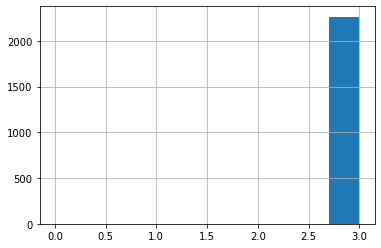

In [71]:
product.hist()

In [35]:
#confirm there is no null values
product.isna().sum()


0

In [36]:
# split the data for product columns
x1_train,x1_test,y1_train,y1_test = train_test_split(data,product,test_size=0.2)

In [37]:
#check whether the predict columns have null values.
y1_train.isna().sum()

0

In [38]:
x1_train.shape

(1814, 13)

In [39]:
knn=KNeighborsClassifier(n_neighbors=3)

In [40]:
x1_train.columns

Index(['siteid', 'programid', 'eventid', 'WO#', 'ZIP', 'categoryname',
       'categoryname.1', 'Branch', 'programname', 'Program Type', 'eventname',
       'Site Name', 'Site Address'],
      dtype='object')

In [41]:
model = LogisticRegression(solver='liblinear')

In [42]:
knn.fit(x1_train,y1_train)

KNeighborsClassifier(n_neighbors=3)

In [43]:
knn.score(x1_train,y1_train)

0.9988974641675854

In [44]:
knn.score(x1_test,y1_test)

0.9933920704845814

In [45]:
knn.predict(x1_test)

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [46]:
model.fit(x1_train,y1_train)

LogisticRegression(solver='liblinear')

In [47]:
model.score(x1_train,y1_train)

0.9988974641675854

In [48]:
model.score(x1_test,y1_test)

0.9933920704845814

we can see that the score using two different algorithmns is pretty similar.

In [49]:
bait = transform(df,'Bait_Materials_Applied')

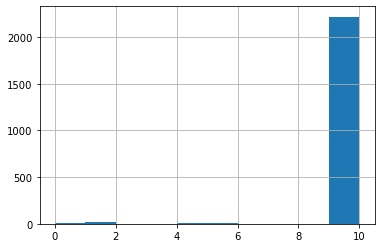

In [50]:
bait.hist()

In [51]:
# split the data for bait columns
x2_train,x2_test,y2_train,y2_test = train_test_split(data,bait,test_size=0.2)

In [52]:
knn.fit(x2_train,y2_train)

KNeighborsClassifier(n_neighbors=3)

In [53]:
knn.score(x2_train,y2_train)

0.9812568908489526

In [54]:
knn.score(x2_test,y2_test)

0.9801762114537445

In [55]:
model.fit(x2_train,y2_train)

LogisticRegression(solver='liblinear')

In [56]:
model.score(x2_test,y2_test)

0.9757709251101322

In [57]:
model.score(x2_train,y2_train)

0.9785005512679162

In [60]:
df['Hardware_Materials_Applied'].isna().sum()

2268

In [61]:
df['service_Materials_Applied'].isna().sum()

2268

In [62]:
df['Equipment_Materials_Applied'].isna().sum()

2177

In [64]:
equipment = transform(df,'Equipment_Materials_Applied')

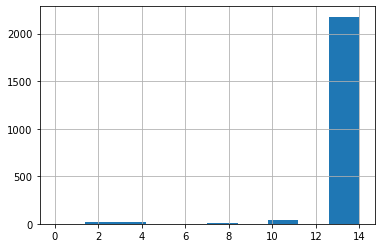

In [65]:
equipment.hist()

In [66]:
# split the data for bait columns
x3_train,x3_test,y3_train,y3_test = train_test_split(data,equipment,test_size=0.2)

In [67]:
knn.fit(x3_train,y3_train)

KNeighborsClassifier(n_neighbors=3)

In [68]:
knn.score(x3_train,y3_train)

0.9652701212789415

In [69]:
knn.score(x3_test,y3_test)

0.9691629955947136

In [70]:
knn.predict(x3_test)

array([14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14,  2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14,  4, 14, 14, 14